# Project 2
Dataset Source: [IMDb Top 1000 Movies Kaggle Dataset](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows/data)

In [72]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
palette = sns.color_palette('Set2')

import plotly.express as px
import plotly.graph_objects as go
from pandas.api.types import CategoricalDtype
pd.set_option('display.float_format', lambda x: '%.2f' %x)

import warnings
warnings.filterwarnings('ignore')
from matplotlib.ticker import FuncFormatter


print("All modules loaded")

All modules loaded


### Import Dataset

In [2]:
df = pd.read_csv('imdb_top_1000.csv')

In [3]:
print("Dataset Size:", df.shape)
df.head()

Dataset Size: (1000, 16)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### Missing value and Duplicate check

In [4]:
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.00,843.00,1000.00
mean,7.95,77.97,273692.91
std,0.28,12.38,327372.70
min,7.60,28.00,25088.00
25%,7.70,70.00,55526.25
50%,7.90,79.00,138548.50
75%,8.10,87.00,374161.25
max,9.30,100.00,2343110.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


To do: 
### 1. Rename columns for easier and consistent naming

### 2. Impute missing values for: 
* cert (done) -> decided to do "Not Rated"
* meta_score (done) -> filled with mean for now

### 3. Transform to Numerical values: 
1. year (done)
2. runtime (done)

### 4. Impute and transform `gross`

In [8]:
# 1. rename columns to lowercase 
df.columns = df.columns.str.lower()

In [9]:
# rename to easier names 
df = df.rename(columns={
    'poster_link': 'link',
    'series_title': 'title', 
    'certificate': 'cert', 
    'released_year': 'year',
})

print(df.columns)

Index(['link', 'title', 'year', 'cert', 'runtime', 'genre', 'imdb_rating',
       'overview', 'meta_score', 'director', 'star1', 'star2', 'star3',
       'star4', 'no_of_votes', 'gross'],
      dtype='object')


In [10]:
# 2. imputing missing values
df['cert'] = df['cert'].fillna('Unrated')
df['meta_score'] = df['meta_score'].fillna(df['meta_score'].mean())

In [11]:
# 3.1 transforming year to appropriate data type
df['year'].value_counts()
# interesting "PG" is a year 

year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: count, Length: 100, dtype: int64

In [12]:
df["year"] = pd.to_datetime(df["year"], format="%Y", errors="coerce") # transforms any invalid characters to NaT
df["decade"] = (df["year"].dt.year // 10) * 10

In [13]:
# Check the DataFrame again
print("\nAfter parsing:\n", df)

# View rows that failed to parse
invalid_rows = df[df["year"].isnull()]
print("\nRows with invalid years:\n", invalid_rows)


After parsing:
                                                   link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                        title       year     cert  runtime  \
0    The Shawshank Redemption 1994-01-01        A  142 min   
1               The Godfather 1972-01-01        A  175 min   
2             The Dark Knight 2008-01-01       UA  152 min   
3      The Godfather: Part II 1974-01-

In [14]:
df = df.dropna(subset=["year"]) # drop row with invalid year value `PG`
print(df.shape)

(999, 17)


In [15]:
# 3.2 transforming runtime to numerical 
df["runtime"].value_counts()

runtime
100 min    23
130 min    23
129 min    22
101 min    22
113 min    22
           ..
185 min     1
205 min     1
212 min     1
238 min     1
78 min      1
Name: count, Length: 140, dtype: int64

In [16]:
def convert_runtime(runtime_series):
    """
    Converts a column with runtime values into numeric format.
    Strips 'min' if it exists and converts to integer.
    
    Args:
    runtime_series (pd.Series): Series containing runtime values.
    
    Returns:
    pd.Series: Numeric series with runtime values.
    """
    return (
        runtime_series.astype(str)  # Ensure all values are strings
        .str.lower()  # Convert to lowercase for uniformity
        .str.replace(r"\s*min$", "", regex=True)  # Remove 'min' at the end
        .str.strip()  # Remove any leading or trailing whitespace
        .replace(r"[^0-9]", "", regex=True)  # Remove any non-numeric characters
        .replace("", pd.NA)  # Convert empty strings to NaN
        .astype("Int64")  # Convert to float 
    )

df["runtime"] = convert_runtime(df["runtime"])
df["runtime"].value_counts()

runtime
100    23
130    23
129    22
101    22
113    22
       ..
185     1
205     1
212     1
238     1
78      1
Name: count, Length: 140, dtype: Int64

In [17]:
# 4. Transforming gross datatype
print(df['gross'].value_counts())

gross
4,360,000      5
25,000,000     2
5,450,000      2
5,321,508      2
9,600,000      2
              ..
106,662        1
10,950         1
4,018,695      1
141,319,928    1
30,500,000     1
Name: count, Length: 822, dtype: int64


In [18]:
# checking what years we are missing gross reveneue for 
df[df["gross"].isna()]["year"].value_counts().sort_index()

year
1920-01-01    1
1922-01-01    1
1928-01-01    1
1931-01-01    1
1932-01-01    2
             ..
2016-01-01    5
2017-01-01    2
2018-01-01    5
2019-01-01    7
2020-01-01    6
Name: count, Length: 77, dtype: int64

In [19]:
# drama has most missing values
df[df["gross"].isna()]["genre"].value_counts()

genre
Drama                        10
Action, Crime, Drama          8
Comedy, Drama                 6
Drama, Romance                6
Biography, Drama, History     5
                             ..
Crime, Drama, Horror          1
Comedy, Drama, War            1
Drama, Film-Noir, Mystery     1
Comedy, Crime, Thriller       1
Crime, Mystery, Thriller      1
Name: count, Length: 91, dtype: int64

In [20]:
# transform `gross` to numeric 
df['gross'] = df['gross'].str.replace(',', '', regex=True) # remove commas before converting to numeric 
df['gross'] = pd.to_numeric(df['gross'], errors='coerce') 

In [21]:
missing_gross = df["gross"].isnull().sum()
print("Number of missing 'gross' values before imputation:", missing_gross)

missing_rows = df[df["gross"].isna()]
cols_to_show = ["title", "year", "gross"]
print("\nRows with missing gross:\n", missing_rows[cols_to_show])

Number of missing 'gross' values before imputation: 169

Rows with missing gross:
                       title       year  gross
18                 Hamilton 2020-01-01    NaN
20          Soorarai Pottru 2020-01-01    NaN
30                  Seppuku 1962-01-01    NaN
32    It's a Wonderful Life 1946-01-01    NaN
46           Hotaru no haka 1988-01-01    NaN
..                      ...        ...    ...
993                  Blowup 1966-01-01    NaN
995  Breakfast at Tiffany's 1961-01-01    NaN
996                   Giant 1956-01-01    NaN
998                Lifeboat 1944-01-01    NaN
999            The 39 Steps 1935-01-01    NaN

[169 rows x 3 columns]


In [22]:
# imputing median by year for the missing gross reveneues 
df['gross'] = df.groupby(['year'])['gross'].transform(lambda x: x.fillna(x.mean()))

In [23]:
missing_after = df["gross"].isna().sum()
print("Number of missing values in 'gross' after imputation:", missing_after)

missing_rows_after = df[df["gross"].isna()]
print("\nRows with missing gross:\n", missing_rows_after[cols_to_show])

Number of missing values in 'gross' after imputation: 11

Rows with missing gross:
                                  title       year  gross
18                            Hamilton 2020-01-01    NaN
20                     Soorarai Pottru 2020-01-01    NaN
205                               Soul 2020-01-01    NaN
321       Das Cabinet des Dr. Caligari 1920-01-01    NaN
464                        Dil Bechara 2020-01-01    NaN
567                             Freaks 1932-01-01    NaN
568                          Nosferatu 1922-01-01    NaN
612         The Trial of the Chicago 7 2020-01-01    NaN
613                               Druk 2020-01-01    NaN
712                  Shadow of a Doubt 1943-01-01    NaN
718  Scarface: The Shame of the Nation 1932-01-01    NaN


In [24]:
# drop the remaining missing gross values 
df = df.dropna(subset=["gross"]) 

#### Sanity Check 

In [25]:
print("\nData types:\n", df.dtypes)


Data types:
 link                   object
title                  object
year           datetime64[ns]
cert                   object
runtime                 Int64
genre                  object
imdb_rating           float64
overview               object
meta_score            float64
director               object
star1                  object
star2                  object
star3                  object
star4                  object
no_of_votes             int64
gross                 float64
decade                float64
dtype: object


In [26]:
df.isna().sum()

link           0
title          0
year           0
cert           0
runtime        0
genre          0
imdb_rating    0
overview       0
meta_score     0
director       0
star1          0
star2          0
star3          0
star4          0
no_of_votes    0
gross          0
decade         0
dtype: int64

In [27]:
print('Released Year Range:', df['year'].min(), 'to', df['year'].max())
print('IMDB Rating Range:', df['imdb_rating'].min(), 'to', df['imdb_rating'].max())
print('Meta Score Range:', df['meta_score'].min(), 'to', df['meta_score'].max())
print('Gross Range:', df['gross'].min(), 'to', df['gross'].max())

Released Year Range: 1921-01-01 00:00:00 to 2019-01-01 00:00:00
IMDB Rating Range: 7.6 to 9.3
Meta Score Range: 28.0 to 100.0
Gross Range: 1305.0 to 936662225.0


### Checking value counts of each column

In [28]:
for col in df.columns:
    print(f"Column name: {col}")
    print(df[col].value_counts(dropna=False))
    print("-"*50)
    print("\n")

Column name: link
link
https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg                    1
https://m.media-amazon.com/images/M/MV5BY2EyZDlhNjItODYzNi00Mzc3LWJjOWUtMTViODU5MTExZWMyL2ltYWdlXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX67_CR0,0,67,98_AL_.jpg            1
https://m.media-amazon.com/images/M/MV5BODllYjM1ODItYjBmOC00MzkwLWJmM2YtMjMyZDU3MGJhNjc4L2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX67_CR0,0,67,98_AL_.jpg    1
https://m.media-amazon.com/images/M/MV5BNDYwOThlMDAtYWUwMS00MjY5LTliMGUtZWFiYTA5MjYwZDAyXkEyXkFqcGdeQXVyNjY1NTQ0NDg@._V1_UX67_CR0,0,67,98_AL_.jpg                    1
https://m.media-amazon.com/images/M/MV5BMjA3Y2I4NjAtMDQyZS00ZGJhLWEwMzgtODBiNzE5Zjc1Nzk1L2ltYWdlXkEyXkFqcGdeQXVyNTc2MDU0NDE@._V1_UX67_CR0,0,67,98_AL_.jpg            1
                                                                                                                                              

### Dropping values we don't need 
* link 
* description
* etc ...

* Durham title appears twice
* gross is exactly 29324714.67 for 10 titles, is this strange? 

In [29]:
# drop link 
df.drop(['link', 'overview'], axis=1, inplace=True)

In [30]:
# look up durham in title column 
drishyam_entries = df[df['title'].str.contains('Drishyam', case=False, na=False)]
print(drishyam_entries) # seems to be 2 different movies with the same title

        title       year cert  runtime                   genre  imdb_rating  \
87   Drishyam 2013-01-01    U      160  Crime, Drama, Thriller         8.30   
136  Drishyam 2015-01-01   UA      163   Crime, Drama, Mystery         8.20   

     meta_score         director       star1         star2         star3  \
87        77.97    Jeethu Joseph    Mohanlal         Meena  Asha Sharath   
136       77.97  Nishikant Kamat  Ajay Devgn  Shriya Saran          Tabu   

            star4  no_of_votes       gross  decade  
87         Ansiba        30722 47605822.11 2010.00  
136  Rajat Kapoor        70367   739478.00 2010.00  


## EDA after Data Cleaning 

In [31]:
display(df.head())
display(df.info())
display(df.describe(include='all'))

,title,year,cert,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,decade
0,The Shawshank Redemption,1994-01-01,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.00,1990.00
1,The Godfather,1972-01-01,A,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.00,1970.00
2,The Dark Knight,2008-01-01,UA,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.00,2000.00
3,The Godfather: Part II,1974-01-01,A,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.00,1970.00
4,12 Angry Men,1957-01-01,U,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.00,1950.00


<class 'pandas.core.frame.DataFrame'>
Index: 988 entries, 0 to 999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        988 non-null    object        
 1   year         988 non-null    datetime64[ns]
 2   cert         988 non-null    object        
 3   runtime      988 non-null    Int64         
 4   genre        988 non-null    object        
 5   imdb_rating  988 non-null    float64       
 6   meta_score   988 non-null    float64       
 7   director     988 non-null    object        
 8   star1        988 non-null    object        
 9   star2        988 non-null    object        
 10  star3        988 non-null    object        
 11  star4        988 non-null    object        
 12  no_of_votes  988 non-null    int64         
 13  gross        988 non-null    float64       
 14  decade       988 non-null    float64       
dtypes: Int64(1), datetime64[ns](1), float64(4), int64(1), object(8

None

,title,year,cert,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,decade
count,988,988,988,988.00,988,988.00,988.00,988,988,988,988,988,988.00,988.00,988.00
unique,987,NaN,16,<NA>,199,NaN,NaN,542,652,833,881,929,NaN,NaN,NaN
top,Drishyam,NaN,U,<NA>,Drama,NaN,NaN,Steven Spielberg,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,NaN,NaN
freq,2,NaN,231,<NA>,84,NaN,NaN,13,11,7,5,4,NaN,NaN,NaN
mean,NaN,1991-05-10 03:26:57.813765120,NaN,123.03,NaN,7.95,77.93,NaN,NaN,NaN,NaN,NaN,275957.23,66089395.33,1986.68
min,NaN,1921-01-01 00:00:00,NaN,45.00,NaN,7.60,28.00,NaN,NaN,NaN,NaN,NaN,25088.00,1305.00,1920.00
25%,NaN,1976-01-01 00:00:00,NaN,103.00,NaN,7.70,72.00,NaN,NaN,NaN,NaN,NaN,56287.50,4128093.25,1970.00
50%,NaN,1999-01-01 00:00:00,NaN,119.00,NaN,7.90,77.97,NaN,NaN,NaN,NaN,NaN,139966.50,27904009.50,1990.00
75%,NaN,2009-01-01 00:00:00,NaN,137.00,NaN,8.10,85.25,NaN,NaN,NaN,NaN,NaN,377110.75,83912756.72,2000.00
max,NaN,2019-01-01 00:00:00,NaN,321.00,NaN,9.30,100.00,NaN,NaN,NaN,NaN,NaN,2343110.00,936662225.00,2010.00


#### Distribution of Key Features

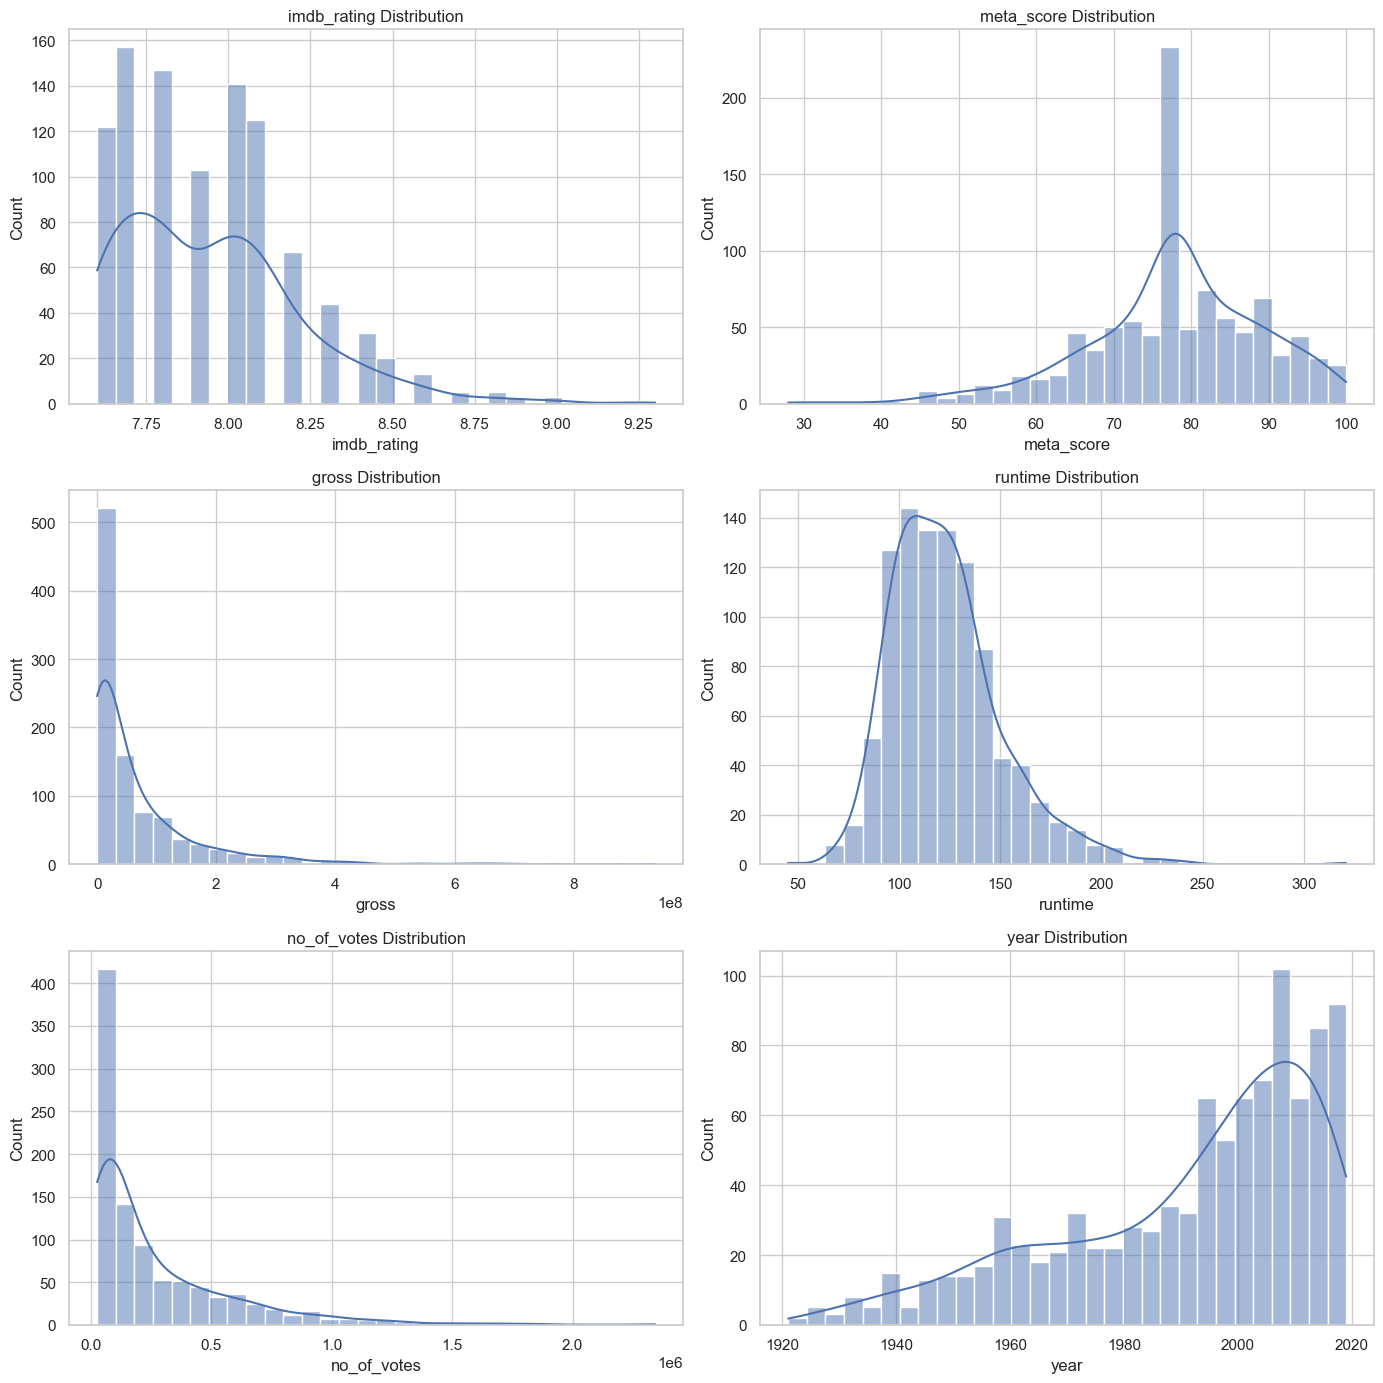

In [32]:
fig, axs = plt.subplots(3, 2, figsize=(14, 14))
axs = axs.ravel()

cols = ['imdb_rating', 'meta_score', 'gross', 'runtime', 'no_of_votes', 'year']
for i, col in enumerate(cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axs[i], bins=30)
    axs[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

#### Correlation Analysis

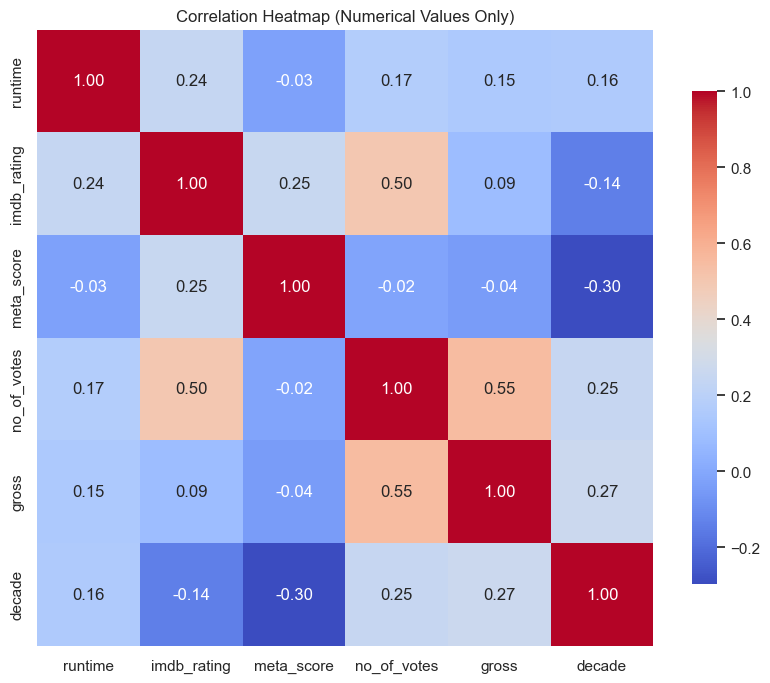

In [33]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap (Numerical Values Only)')
plt.show()


## Relationship Between `certificate` and `IMDB Rating`

**Distribution of IMDb Ratings by Certificate**

In [34]:
df_counts = df['cert'].value_counts().reset_index()
df_counts.columns = ['cert', 'count']

In [35]:
df.groupby('cert')['imdb_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
cert,,,,,,,,
16,1.00,8.10,NaN,8.10,8.10,8.10,8.10,8.10
A,197.00,8.00,0.35,7.60,7.70,8.00,8.20,9.30
Approved,11.00,7.95,0.17,7.70,7.80,8.00,8.10,8.10
G,12.00,8.00,0.31,7.60,7.70,8.00,8.15,8.50
GP,2.00,7.85,0.35,7.60,7.72,7.85,7.97,8.10
PG,35.00,7.93,0.21,7.60,7.80,7.90,8.10,8.60
PG-13,42.00,7.78,0.17,7.60,7.60,7.70,7.90,8.30
Passed,34.00,8.02,0.21,7.60,7.90,8.05,8.20,8.40
R,145.00,7.87,0.22,7.60,7.70,7.80,8.00,8.60


### Cert type Data Cleaning and Consolidation

In [36]:
df_counts = df['cert'].value_counts().reset_index()
df_counts.columns = ['cert', 'count']

description_map = {
    'A'       : "Indian rating, only (18+)",
    'Approved': "Historic MPAA rating used pre-1968",
    'G'       : "General audiences",
    'GP'      : "Early variant of today's PG",
    'PG'      : "Parental Guidance suggested",
    'PG-13'   : "Parents cautioned (under 13)",
    'Passed'  : "Historic rating used by the Production Code",
    'R'       : "Restricted audiences",
    'U'       : "Indian rating (all ages)",
    'U/A'     : "Indian rating, PG (under 12)",
    'UA'      : "Indian rating, PG (under 12)",
    'Unrated' : "No MPAA or missing",
    '16'      : "European countries (16+)",
    'TV-14'   : "Television rating for viewers 14 and older",
    'TV-MA'   : "Television rating for mature audiences",
    'TV-PG'   : "Television rating for PG"
}

df_counts['description'] = df_counts['cert'].map(description_map)

cert_simplified_map = {
    'A'       : 'R',
    'Approved': 'OldCode',
    'G'       : 'G',
    'GP'      : 'PG',
    'PG'      : 'PG',
    'PG-13'   : 'PG-13',
    'Passed'  : 'OldCode',
    'R'       : 'R',
    'U'       : 'G',
    'U/A'     : 'PG-13',
    'UA'      : 'PG-13',
    'Unrated' : 'Unrated',
    '16'      : 'R',
    'TV-14'   : 'Dropped',
    'TV-MA'   : 'Dropped',
    'TV-PG'   : 'Dropped'
}

df_counts['cert_simplified'] = df_counts['cert'].map(cert_simplified_map)

In [ ]:
ordered_cats = ["G", "PG", "PG-13", "R", "Unrated", "OldCode", "Dropped"]
cat_type = CategoricalDtype(categories=ordered_cats, ordered=True)
df_counts['cert_simplified'] = df_counts['cert_simplified'].astype(cat_type)
df_counts= df_counts.sort_values('cert_simplified').reset_index(drop=True)
df_counts[['cert', 'count', 'description', 'cert_simplified']]

,cert,count,description,cert_simplified
0,U,231,Indian rating (all ages),G
1,G,12,General audiences,G
2,PG,35,Parental Guidance suggested,PG
3,GP,2,Early variant of today's PG,PG
4,UA,174,"Indian rating, PG (under 12)",PG-13
5,PG-13,42,Parents cautioned (under 13),PG-13
6,U/A,1,"Indian rating, PG (under 12)",PG-13
7,A,197,"Indian rating, only (18+)",R
8,R,145,Restricted audiences,R
9,16,1,European countries (16+),R


In [38]:
table = df_counts[['cert','count','description','cert_simplified']]

styled_table = (
    table
    .style
    .hide(axis='index')  
    .set_caption("Certificate Consolidation Table") 
    .set_table_styles(
        [
            {
                "selector": "th",
                "props": [("background-color", "#DCE6F1"), ("color", "black")]
            },
            {
                "selector": "caption",
                "props": [("font-size", "110%"), ("font-weight", "bold"), ("text-align", "left"), ("caption-side", "left")]
            }
        ]
    )
)
styled_table = styled_table.set_properties(**{"text-align": "left"})
styled_table

cert,count,description,cert_simplified
U,231,Indian rating (all ages),G
G,12,General audiences,G
PG,35,Parental Guidance suggested,PG
GP,2,Early variant of today's PG,PG
UA,174,"Indian rating, PG (under 12)",PG-13
PG-13,42,Parents cautioned (under 13),PG-13
U/A,1,"Indian rating, PG (under 12)",PG-13
A,197,"Indian rating, only (18+)",R
R,145,Restricted audiences,R
16,1,European countries (16+),R


In [39]:
# Drop all TV certificates (rows containing TV-14, TV-MA, TV-PG)
df = df[~df['cert'].isin(['TV-14', 'TV-MA', 'TV-PG'])]

df['cert_simplified'] = df['cert']

#  Merge old certificates, adult ratings, etc. using replace()
df['cert_simplified'] = df['cert_simplified'].replace({
    # Merge short-lived GP into PG
    'GP': 'PG',
    # Combine older codes (Approved, Passed) into one label
    'Approved': 'OldCode',
    'Passed': 'OldCode',
    # Merge Indian 'A' (18) + '16' rating into R
    'A': 'R',
    '16': 'R',
    # Merge Indian 'U' with G
    'U': 'G',
    # Merge Indian 'UA' and 'U/A' with PG-13 
    'UA': 'PG',
    'U/A': 'PG' 
})

# Check the resulting categories
df['cert_simplified'].value_counts()

cert_simplified
R          343
G          243
PG         212
Unrated     98
OldCode     45
PG-13       42
Name: count, dtype: int64

In [40]:
df.groupby('cert_simplified')['imdb_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
cert_simplified,,,,,,,,
G,243.00,7.98,0.28,7.60,7.70,8.00,8.10,9.00
OldCode,45.00,8.00,0.20,7.60,7.90,8.00,8.10,8.40
PG,212.00,7.95,0.27,7.60,7.70,7.90,8.10,9.00
PG-13,42.00,7.78,0.17,7.60,7.60,7.70,7.90,8.30
R,343.00,7.94,0.31,7.60,7.70,7.90,8.10,9.30
Unrated,98.00,7.93,0.21,7.60,7.80,8.00,8.10,8.60


In [41]:
df.groupby('cert_simplified')['gross'].describe()

,count,mean,std,min,25%,50%,75%,max
cert_simplified,,,,,,,,
G,243.00,80354333.95,111700680.31,19181.00,5224816.00,42318285.83,109822346.50,936662225.00
OldCode,45.00,13546680.29,24735371.48,10177.00,539540.00,4905000.00,11661484.00,93740000.00
PG,212.00,111827390.24,151315304.87,7461.00,10612078.00,48711824.00,166421635.00,858373000.00
PG-13,42.00,38596861.23,53087990.80,355613.00,4422340.25,14330954.00,50360477.25,209028679.00
R,343.00,49746668.57,62232076.91,1305.00,5352671.00,26830000.00,70385452.50,363070709.00
Unrated,98.00,25421410.12,37042892.27,3296.00,210971.50,4170500.00,31476229.38,121076954.14


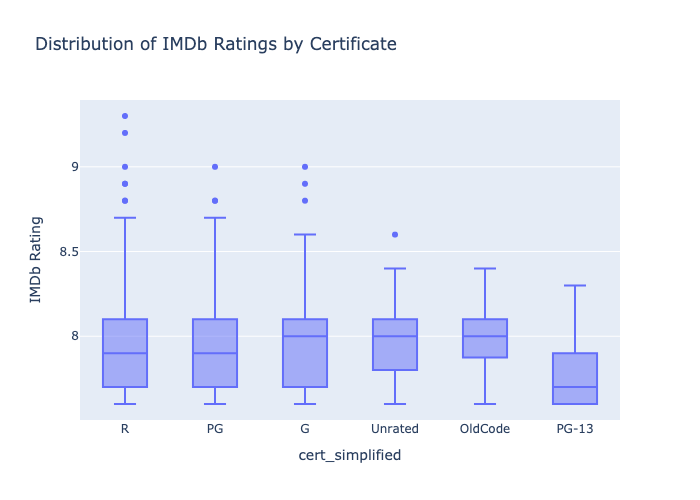

In [42]:
fig = px.box(
    df, 
    x='cert_simplified', 
    y='imdb_rating',
    title='Distribution of IMDb Ratings by Certificate',
    labels={'cert': 'Certificate', 'imdb_rating': 'IMDb Rating'}
)
fig.show("png")

**Boxplot of Ratings by Certificate**

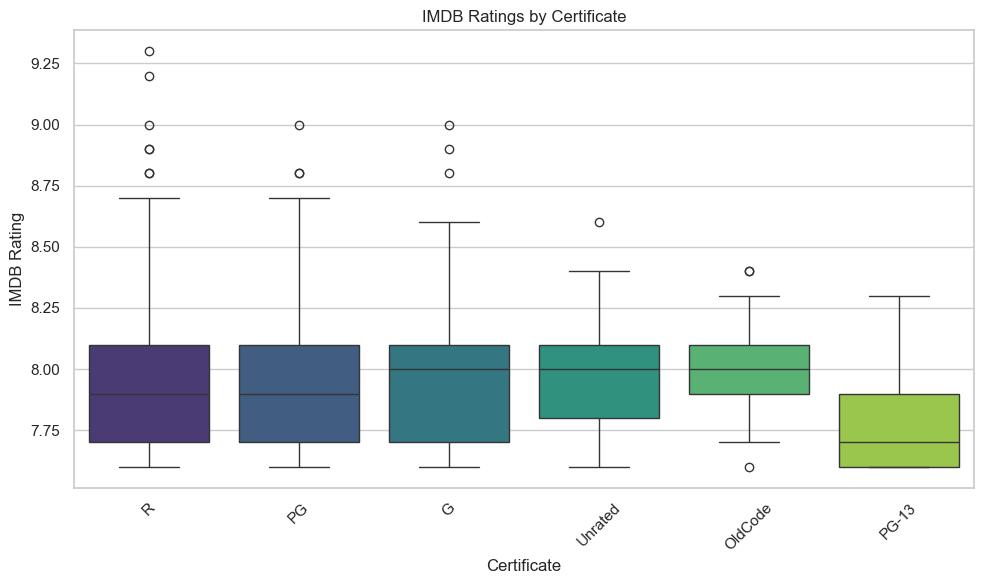

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cert_simplified', y='imdb_rating', palette='viridis')
plt.title('IMDB Ratings by Certificate')
plt.xlabel('Certificate')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Line in the middle is median rating, points outside of whiskers are outliers. 

**Violinplot of Ratings by Certificate**

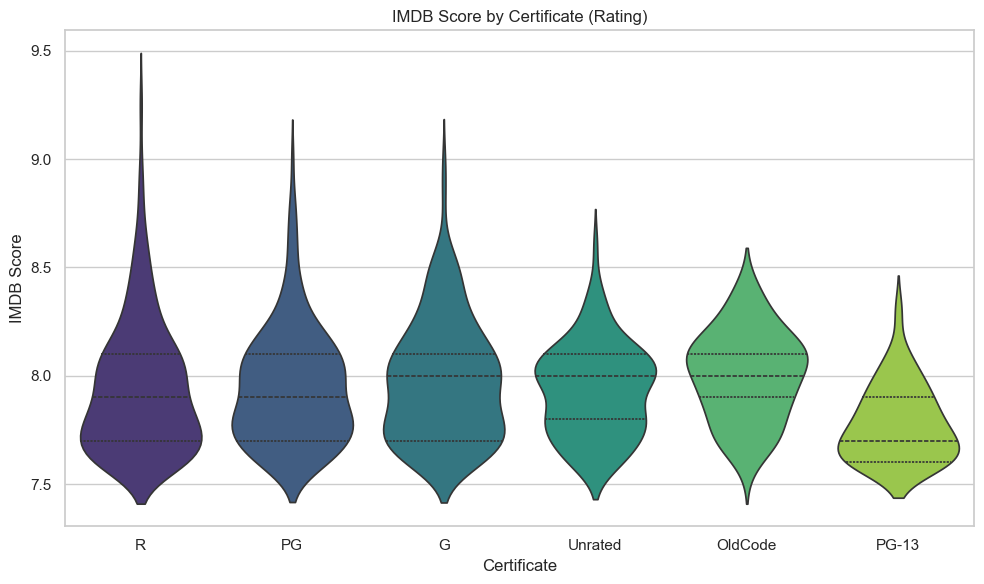

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='cert_simplified', 
               y='imdb_rating', 
               inner='quartile',
               palette='viridis'
)
plt.title('IMDB Score by Certificate (Rating)')
plt.xlabel('Certificate')
plt.ylabel('IMDB Score')
plt.tight_layout()
plt.show()

**Violinplot of Gross by Certificate**

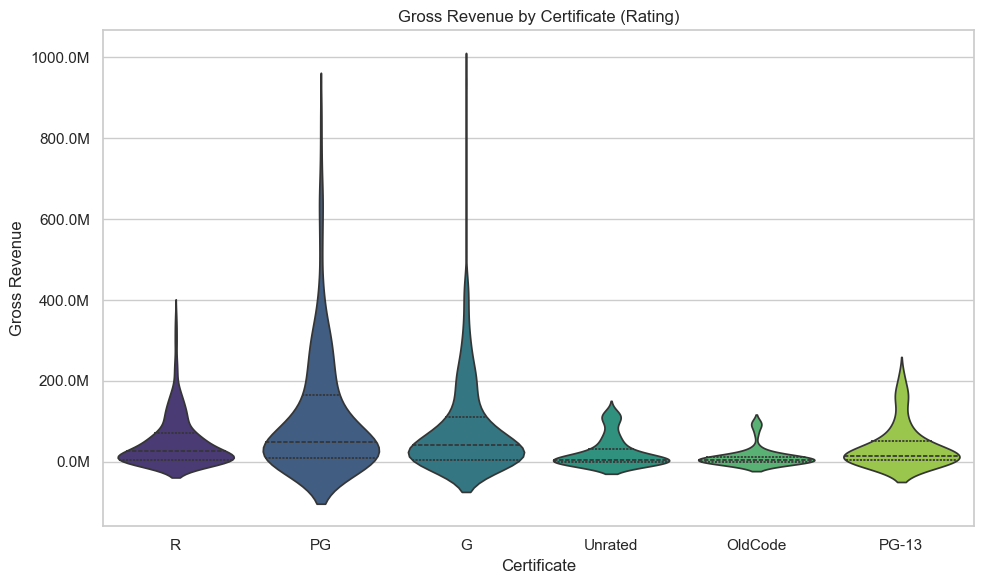

In [45]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='cert_simplified', 
               y='gross', 
               inner='quartile',
               palette='viridis'
)
def millions(x, pos):
    return f'{x*1e-6:.1f}M'

plt.title('Gross Revenue by Certificate (Rating)')
plt.xlabel('Certificate')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.ylabel('Gross Revenue')
plt.tight_layout()
plt.show()

**Boxplot of Gross by Certificate**

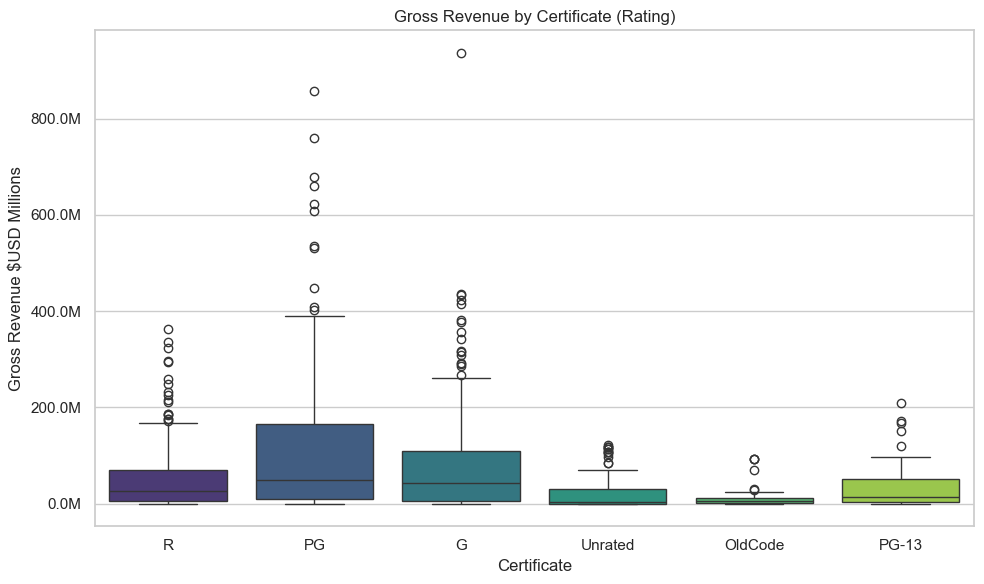

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cert_simplified', y='gross', palette='viridis')
plt.title('Gross Revenue by Certificate (Rating)')
plt.xlabel('Certificate')
plt.ylabel('Gross Revenue')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.ylabel('Gross Revenue $USD Millions')
plt.tight_layout()
plt.show()

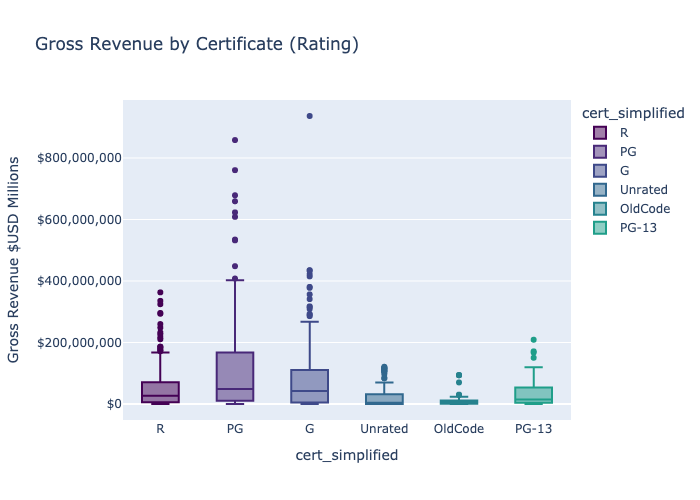

In [47]:
# as plotly so I can see the values 
fig = px.box(
    df, 
    x='cert_simplified', 
    y='gross', 
    color='cert_simplified', 
    title='Gross Revenue by Certificate (Rating)',
    labels={'gross': 'Gross Revenue $USD Millions'},
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
    yaxis_tickprefix="$",
    yaxis_tickformat=","
)
fig.show("png")

**Average IMDb Score by Certificate**

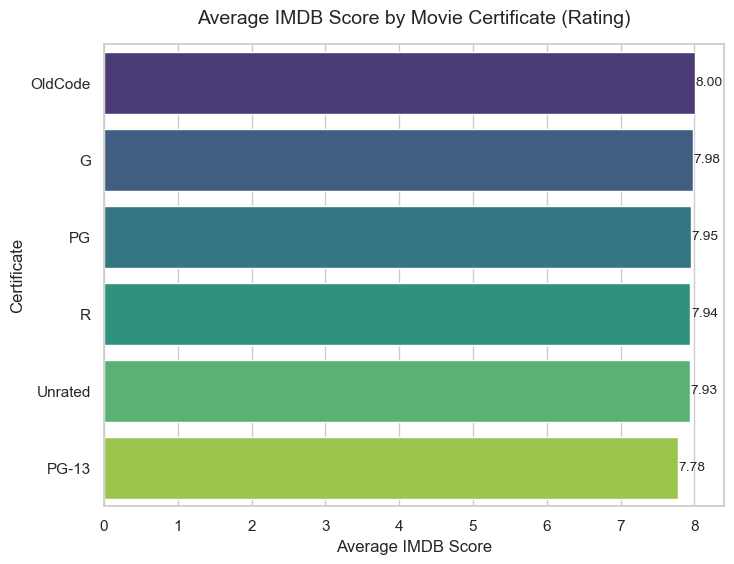

In [48]:
df_grouped = df.groupby('cert_simplified')['imdb_rating'].mean().reset_index()
df_grouped.rename(columns={'imdb_rating': 'avg_rating'}, inplace=True)
df_grouped.sort_values('avg_rating', ascending=False, inplace=True)
sns.set_theme(style="whitegrid")  

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_grouped, 
    x='avg_rating', 
    y='cert_simplified', 
    palette='viridis' 
)
for i, v in enumerate(df_grouped['avg_rating']):
    ax.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=10)

plt.title('Average IMDB Score by Movie Certificate (Rating)', fontsize=14, pad=15)
plt.xlabel('Average IMDB Score', fontsize=12)
plt.ylabel('Certificate', fontsize=12)
plt.show("png")

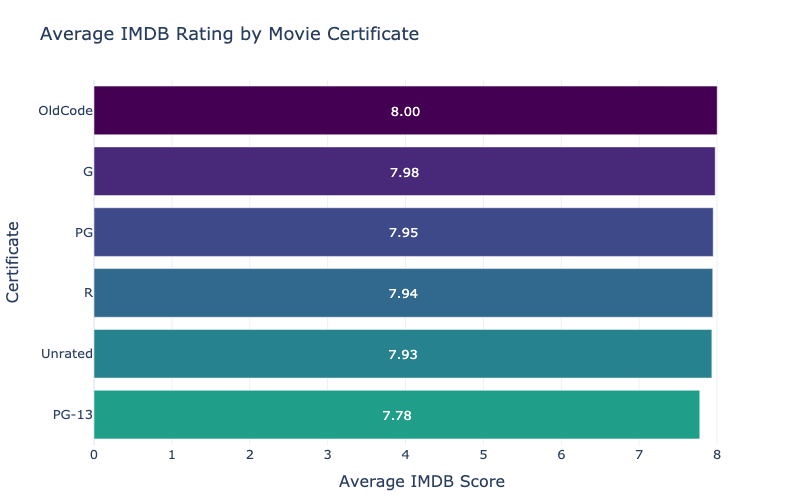

In [49]:
df_count = df.groupby('cert_simplified')['imdb_rating'].count().reset_index(name='count')
df_grouped = df.groupby('cert_simplified')['imdb_rating'].mean().reset_index()
df_grouped.rename(columns={'imdb_rating': 'avg_rating'}, inplace=True)
df_grouped.sort_values('avg_rating', ascending=False, inplace=True)
df_grouped['label'] = df_grouped.apply(lambda x: f"{x['cert_simplified']} ({x['avg_rating']:.2f})", axis=1)


fig = px.bar(
    df_grouped, 
    x='avg_rating', 
    y='cert_simplified', 
    orientation='h',
    color='cert_simplified',  
    text='avg_rating',        
    color_discrete_sequence=px.colors.sequential.Viridis,  
    title='Average IMDB Rating by Movie Certificate'
)

fig.update_traces(
    texttemplate='%{text:.2f}',  
    textposition='inside',
    insidetextanchor='middle',
    textfont_color='white',
    hovertemplate='Certificate: %{y}<br>Avg Rating: %{x:.2f}' 
)

fig.update_layout(
    xaxis_title='Average IMDB Score',
    yaxis_title='Certificate',
    template='plotly_white',      
    showlegend=False,             
    width=800, 
    height=500,
    font=dict(size=13), 
    margin=dict(l=50, r=50, t=80, b=40)
)

fig.show("png")

#### Count the Number of Movies by Certificate and Year

In [50]:
# what year is the unrated movies released? 
unrated_years = df[df['cert_simplified'] == 'Unrated']['year'].sort_values()
unrated_years

462   1925-01-01
126   1927-01-01
717   1933-01-01
999   1935-01-01
716   1935-01-01
         ...    
747   2015-01-01
885   2015-01-01
574   2016-01-01
721   2017-01-01
54    2017-01-01
Name: year, Length: 98, dtype: datetime64[ns]

In [51]:
# what years are the old codes released? 
old_code_years = df[df['cert_simplified'] == 'OldCode']['year'].sort_values()
old_code_years

127   1921-01-01
194   1924-01-01
193   1925-01-01
320   1926-01-01
319   1927-01-01
318   1928-01-01
317   1928-01-01
125   1931-01-01
719   1931-01-01
566   1933-01-01
316   1934-01-01
565   1935-01-01
715   1938-01-01
313   1939-01-01
713   1939-01-01
563   1940-01-01
312   1940-01-01
457   1940-01-01
83    1940-01-01
192   1942-01-01
123   1944-01-01
453   1944-01-01
561   1945-01-01
560   1946-01-01
454   1946-01-01
874   1946-01-01
709   1948-01-01
191   1948-01-01
309   1949-01-01
190   1950-01-01
557   1950-01-01
82    1950-01-01
307   1951-01-01
871   1952-01-01
997   1953-01-01
870   1954-01-01
441   1956-01-01
867   1956-01-01
553   1956-01-01
440   1957-01-01
436   1959-01-01
298   1960-01-01
865   1960-01-01
863   1962-01-01
293   1962-01-01
Name: year, dtype: datetime64[ns]

## Split Up Genre into Separate Entries

In [52]:
df['genre'] = df['genre'].str.split(',')
df = df.explode('genre')

In [53]:
df['genre'] = (df['genre']
               .str.strip()               
               .str.strip(',')           
               .str.title()             
              )

genre_stats = df.groupby('genre').agg(
    Count=('gross', 'count'),
    Total_Gross=('gross', 'sum')
).reset_index()

genre_stats['Average_Gross'] = genre_stats['Total_Gross'] / genre_stats['Count']
genre_stats = genre_stats.sort_values(by='Average_Gross', ascending=False)

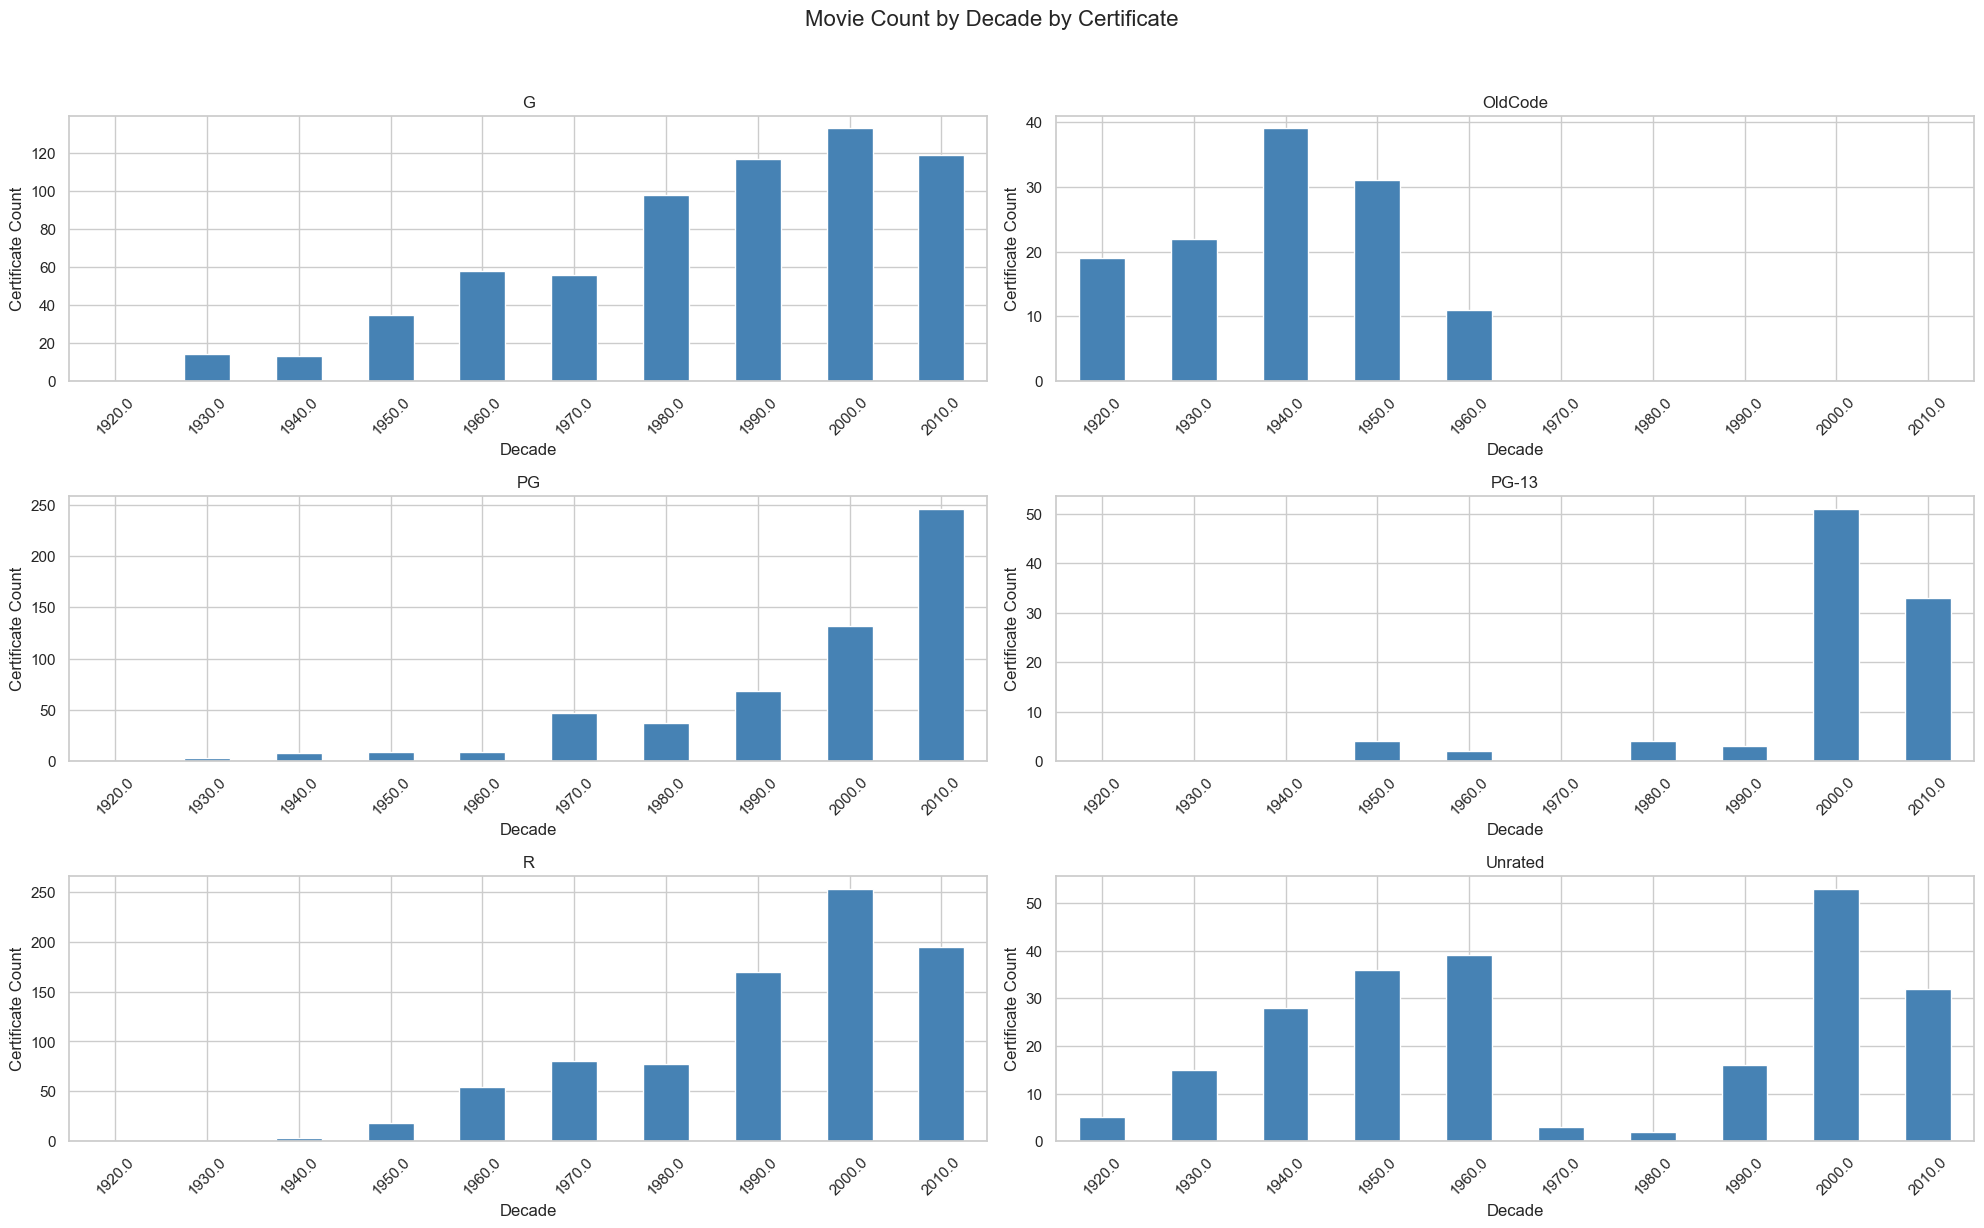

In [54]:
grouped = df.groupby(['decade', 'cert_simplified']).size().reset_index(name='movie_count')
pivoted = grouped.pivot(index='decade', columns='cert_simplified', values='movie_count').fillna(0)
pivoted.sort_index(inplace=True)

certificates = pivoted.columns.tolist()
n_certificates = len(certificates)
n_rows = 4
n_cols = (n_certificates // n_rows) + (1 if n_certificates % n_rows != 0 else 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, cert in enumerate(certificates):
    pivoted[cert].plot(kind='bar', ax=axes[i], color='steelblue')
    axes[i].set_title(cert)
    axes[i].set_xlabel('Decade')
    axes[i].set_ylabel('Certificate Count')
    axes[i].tick_params(axis='x', labelrotation=45)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Movie Count by Decade by Certificate', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Gross revenue by Decade and IMDb Score

In [55]:
rating_bins = [7.5, 8, 8.5, 9, 9.5]
rating_labels = ['7.5 - 8', '8 - 8.5', '8.5 - 9', '9 - 9.5']
df['rating_bin'] = pd.cut(df['imdb_rating'], bins=rating_bins, labels=rating_labels, include_lowest=True)
grouped = df.groupby(['decade', 'rating_bin'])['gross'].mean().reset_index(name='avg_gross')

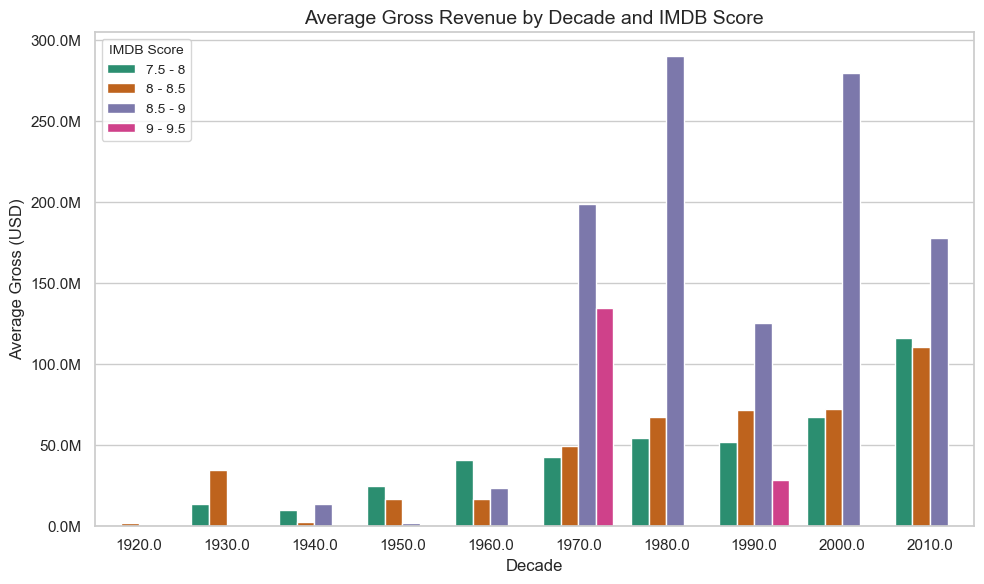

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x='decade',          
    y='avg_gross',
    hue='rating_bin',    
    palette='Dark2'    
)
plt.title('Average Gross Revenue by Decade and IMDB Score', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Gross (USD)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.legend(title='IMDB Score', fontsize=10, title_fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()


## Gross revenue by Decade and IMDb Score adjusted for inflation

In [57]:
inflation_factors = { 1920: 14.7, 1930: 15.2, 1940: 18.6, 1950: 10.8, 1960: 8.8, 1970: 6.7, 1980: 3.3, 1990: 2.0, 2000: 1.5, 2010: 1.2, 2020: 1.0 }

def get_inflation_factor(decade):
    return inflation_factors.get(decade, 1.0)

df['gross_adj'] = df.apply(lambda row: row['gross'] * get_inflation_factor(row['decade']), axis=1)

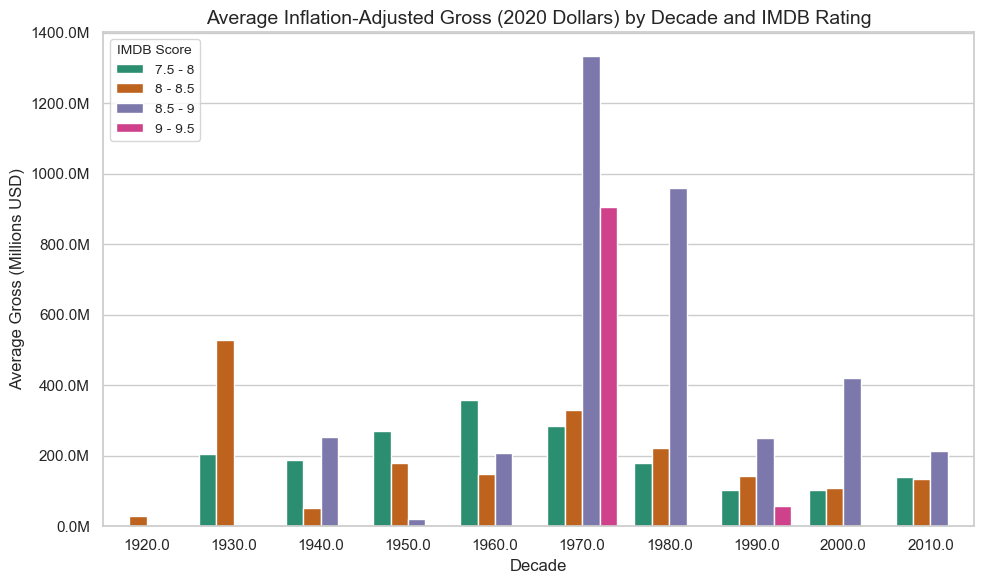

In [58]:
df_grouped = df.groupby(['decade', 'rating_bin'])['gross_adj'].mean().reset_index(name='avg_gross_adj')
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_grouped,
    x='decade',
    y='avg_gross_adj',
    hue='rating_bin',
    palette='Dark2'
)
def millions(x, pos):
    return f'{x*1e-6:.1f}M'
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.title('Average Inflation-Adjusted Gross (2020 Dollars) by Decade and IMDB Rating', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Gross (Millions USD)', fontsize=12)
plt.legend(title='IMDB Score', fontsize=10, title_fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()

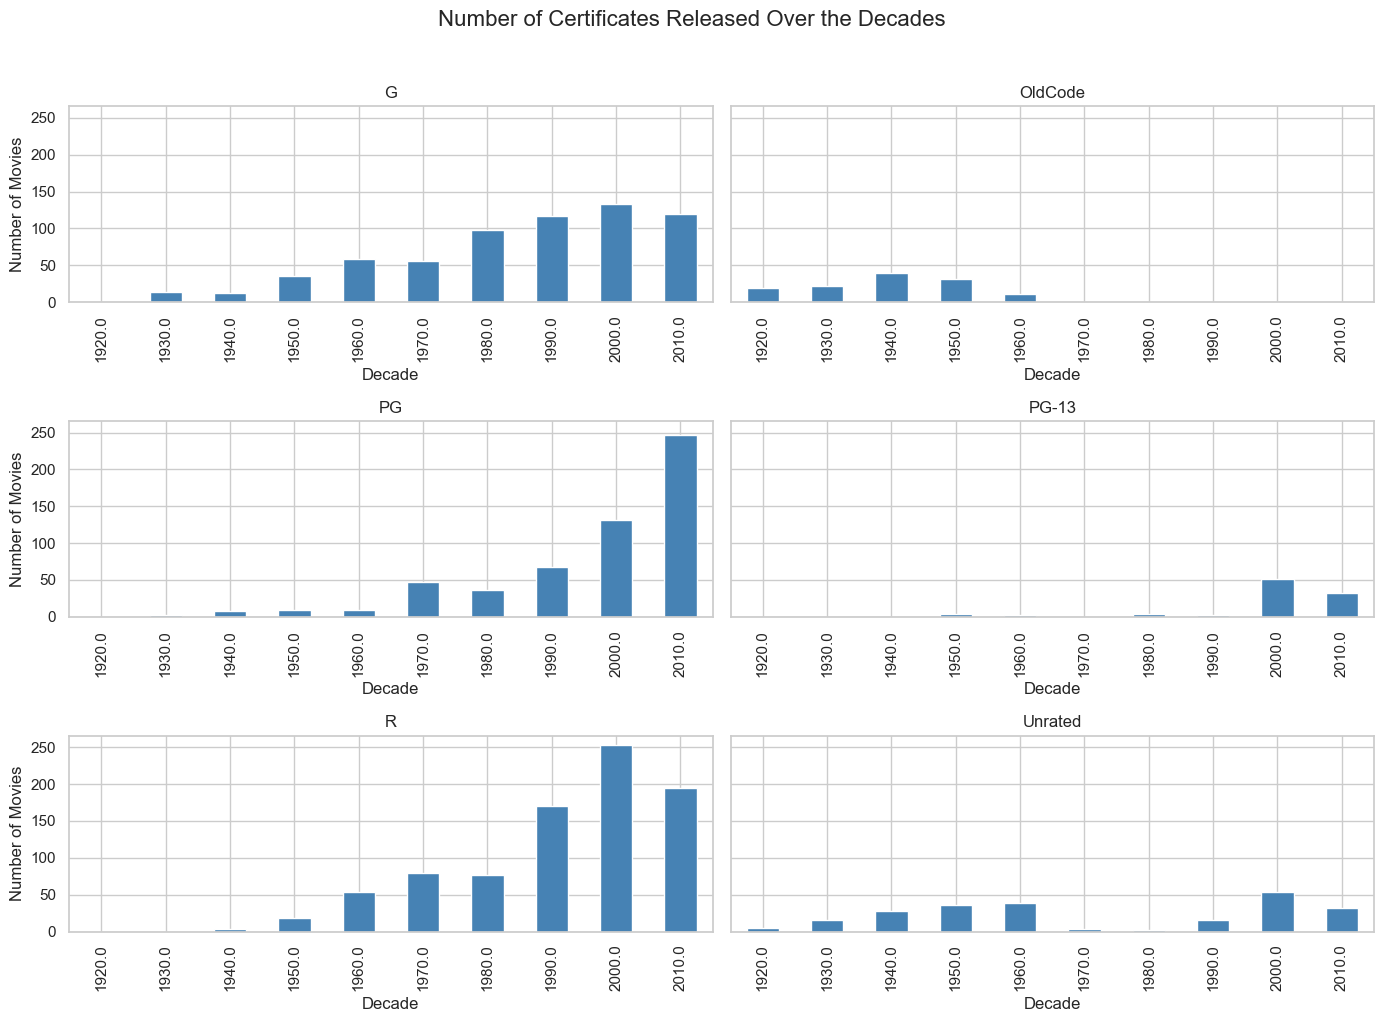

In [59]:
certificates = pivoted.columns.tolist()  
n_certs = len(certificates)
n_rows = 3
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10), sharey=True)
axes = axes.flatten() 
for i, cert in enumerate(certificates):
    pivoted[cert].plot(
        kind='bar',
        ax=axes[i],
        color='steelblue'
    )
    axes[i].set_title(cert)
    axes[i].set_xlabel('Decade')
    axes[i].set_ylabel('Number of Movies')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Number of Certificates Released Over the Decades', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Group by Director: Summaries of IMDB Rating and Gross

In [60]:
# filters the DataFrame to include only directors with at least 2 films,
# then aggregates their average IMDb rating, average gross, and film count.
director_count = df['director'].value_counts().reset_index()
director_count.columns = ['director', 'num_films']

common_directors = director_count[director_count['num_films'] >= 2]['director']
df_filtered = df[df['director'].isin(common_directors)]

df_directors_agg = df_filtered.groupby('director', as_index=False).agg(
    avg_imdb_rating=('imdb_rating', 'mean'),
    avg_gross=('gross', 'mean'),
    num_films=('title', 'count')
)

df_directors_agg = df_directors_agg.sort_values('avg_imdb_rating', ascending=False)
df_top20_rating = df_directors_agg.head(20)
print(df_top20_rating) 


                             director  avg_imdb_rating    avg_gross  num_films
135                    Frank Darabont             8.78 109686397.75          4
183                    Irvin Kershner             8.70 290475067.00          3
266                    Lana Wachowski             8.70 171479930.00          2
130                Fernando Meirelles             8.60   7563397.00          2
296                  Masaki Kobayashi             8.60  29324714.67          3
396                   Roberto Benigni             8.60  57598247.00          3
151                      George Lucas             8.60 322740140.00          3
341                   Olivier Nakache             8.50  13182281.00          3
397                      Roger Allers             8.50 422783777.00          3
357                     Peter Jackson             8.49 325428223.54         13
80                  Christopher Nolan             8.48 244372662.86         21
319                      Milos Forman             8.

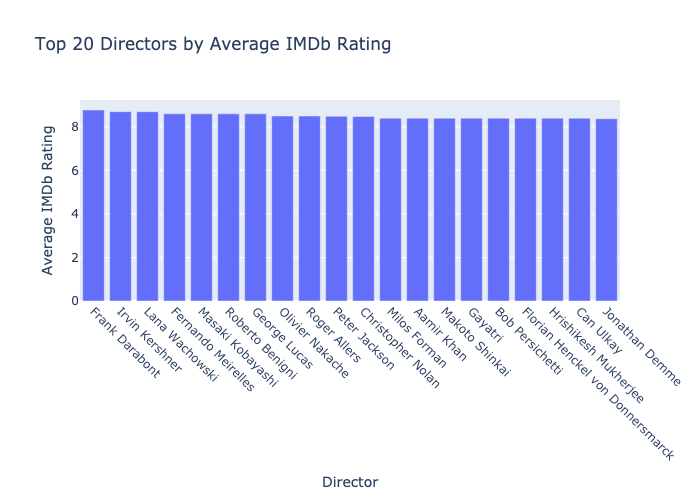

In [61]:
fig = px.bar(
    df_top20_rating, 
    x='director', 
    y='avg_imdb_rating',
    title='Top 20 Directors by Average IMDb Rating',
    labels={'director': 'Director', 'avg_imdb_rating': 'Average IMDb Rating'},
)
fig.update_layout(xaxis_tickangle=45)
fig.show("png")

#### Highest Gross Director

In [62]:
director_stats = (
    df.groupby('director')
      .agg(
          avg_rating=('imdb_rating', 'mean'),
          avg_gross=('gross', 'mean'), 
          count_movies=('gross','count')
      )
      .reset_index().sort_values(by='avg_gross', ascending=False)
)

director_stats.head(20)

,director,avg_rating,avg_gross,count_movies
35,Anthony Russo,8.08,551259850.75,12
147,Gareth Edwards,7.80,532177324.00,3
194,J.J. Abrams,7.83,474390301.67,9
260,Josh Cooley,7.80,434038008.00,3
424,Roger Allers,8.50,422783777.00,3
490,Tim Miller,8.00,363070709.00,3
201,James Cameron,8.08,361845089.75,12
204,James Gunn,7.80,361494850.50,6
65,Byron Howard,8.00,341268248.00,3
106,David Yates,7.80,326317907.00,9


#### Highest IMDb Rated Director

In [63]:
director_stats = (
    df.groupby('director')
      .agg(
          avg_rating=('imdb_rating', 'mean'),
          avg_gross=('gross', 'mean'), 
          count_movies=('gross','count')
      )
      .reset_index().sort_values(by='avg_rating', ascending=False)
)

director_stats.head(20)


,director,avg_rating,avg_gross,count_movies
140,Frank Darabont,8.78,109686397.75,4
190,Irvin Kershner,8.70,290475067.00,3
283,Lana Wachowski,8.70,171479930.00,2
423,Roberto Benigni,8.60,57598247.00,3
134,Fernando Meirelles,8.60,7563397.00,2
315,Masaki Kobayashi,8.60,29324714.67,3
157,George Lucas,8.60,322740140.00,3
363,Olivier Nakache,8.50,13182281.00,3
424,Roger Allers,8.50,422783777.00,3
380,Peter Jackson,8.49,325428223.54,13


#### Director with most released movies

In [64]:
director_stats = (
    df.groupby('director')
      .agg(
          avg_rating=('imdb_rating', 'mean'),
          avg_gross=('gross', 'mean'), 
          count_movies=('gross','count')
      )
      .reset_index().sort_values(by='count_movies', ascending=False)
)

director_stats.head(20)

,director,avg_rating,avg_gross,count_movies
21,Alfred Hitchcock,8.03,10433901.34,35
178,Hayao Miyazaki,8.02,26476791.06,33
466,Steven Spielberg,8.03,185431996.58,31
312,Martin Scorsese,8.16,52453473.56,27
8,Akira Kurosawa,8.22,17951710.12,26
48,Billy Wilder,8.15,13580665.96,24
82,Christopher Nolan,8.48,244372662.86,21
459,Stanley Kubrick,8.20,46091457.56,21
99,David Fincher,7.98,93758120.90,21
388,Quentin Tarantino,8.16,84184096.38,21


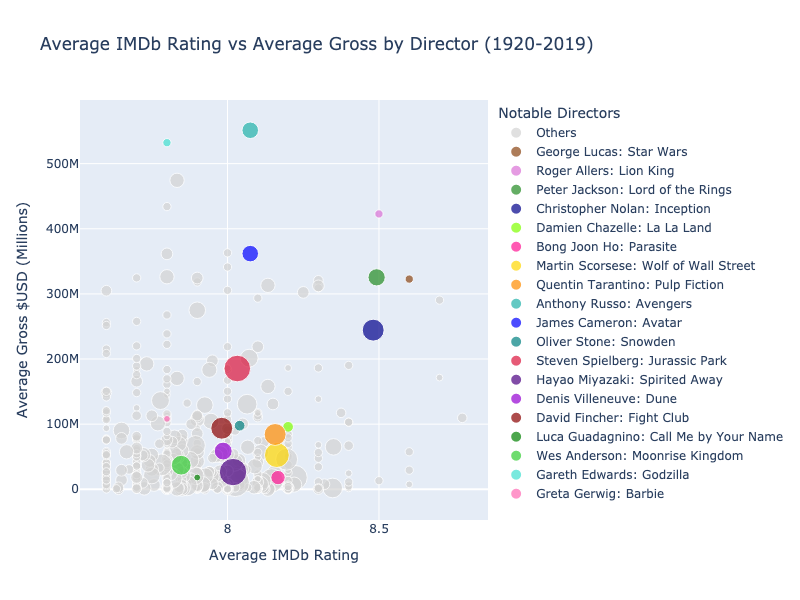

In [65]:
notable_directors = [
    "Steven Spielberg", 
    "Christopher Nolan", 
    "Peter Jackson",
    "Hayao Miyazaki", 
    "Martin Scorsese", 
    "Greta Gerwig", 
    "Anthony Russo",
    "George Lucas", 
    "Roger Allers", 
    "Gareth Edwards", 
    "Bong Joon Ho",
    "Quentin Tarantino", 
    "Luca Guadagnino", 
    "Wes Anderson",
    "Baz Luhrmann",
    "Oliver Stone",
    "James Cameron",
    "Denis Villeneuve",
    "David Fincher",
    "Damien Chazelle"
]

df_directors_agg['plot_category'] = df_directors_agg['director'].apply(
    lambda d: d if d in notable_directors else 'Others'
)

label_map = {
    "Steven Spielberg": "Steven Spielberg: Jurassic Park",
    "Christopher Nolan": "Christopher Nolan: Inception",
    "Peter Jackson": "Peter Jackson: Lord of the Rings",
    "Hayao Miyazaki": "Hayao Miyazaki: Spirited Away",
    "Martin Scorsese": "Martin Scorsese: Wolf of Wall Street",
    "Greta Gerwig": "Greta Gerwig: Barbie",
    "Anthony Russo": "Anthony Russo: Avengers",
    "George Lucas": "George Lucas: Star Wars",
    "Roger Allers": "Roger Allers: Lion King", 
    "Gareth Edwards": "Gareth Edwards: Godzilla",
    "Bong Joon Ho": "Bong Joon Ho: Parasite",
    "Quentin Tarantino": "Quentin Tarantino: Pulp Fiction",
    "Luca Guadagnino": "Luca Guadagnino: Call Me by Your Name", 
    "Wes Anderson": "Wes Anderson: Moonrise Kingdom", 
    "Baz Luhrmann": "Baz Luhrmann: The Great Gatsby",
    "Oliver Stone": "Oliver Stone: Snowden",
    "James Cameron": "James Cameron: Avatar",
    "Denis Villeneuve": "Denis Villeneuve: Dune",
    "David Fincher": "David Fincher: Fight Club",
    "Damien Chazelle": "Damien Chazelle: La La Land"
}

df_directors_agg['legend_label'] = df_directors_agg['director'].apply(
    lambda d: label_map[d] if d in label_map else 'Others'
)

color_map = {
    "Bong Joon Ho: Parasite": "deeppink",
    "Christopher Nolan: Inception": "darkblue",
    "Damien Chazelle: La La Land": "chartreuse",
    "David Fincher: Fight Club": "darkred",
    "Denis Villeneuve: Dune": "darkviolet",
    "Gareth Edwards: Godzilla": "turquoise",
    "George Lucas: Star Wars": "saddlebrown",
    "Greta Gerwig: Barbie": "hotpink",
    "Hayao Miyazaki: Spirited Away": "indigo",
    "James Cameron: Avatar": "blue",
    "Luca Guadagnino: Call Me by Your Name": "green",
    "Martin Scorsese: Wolf of Wall Street": "gold",
    "Oliver Stone: Snowden": "teal",
    "Peter Jackson: Lord of the Rings": "forestgreen",
    "Quentin Tarantino: Pulp Fiction": "darkorange",
    "Roger Allers: Lion King": "orchid",
    "Anthony Russo: Avengers": "lightseagreen",
    "Steven Spielberg: Jurassic Park": "crimson",
    "Wes Anderson: Moonrise Kingdom": "limegreen",
    "Others": "lightgray"
}

fig = px.scatter(
    df_directors_agg,
    x='avg_imdb_rating',
    y='avg_gross',
    hover_name='director',
    color='legend_label',           
    size='num_films',
    labels={
        'avg_imdb_rating': 'Average IMDb Rating',
        'avg_gross': 'Average Gross $USD (Millions)'
    },
    title='Average IMDb Rating vs Average Gross by Director (1920-2019)',
    color_discrete_map=color_map    
)

fig.update_layout(
    legend_title_text='Notable Directors',
    width=800,
    height=600
)

fig.show("png")

In [66]:
df['director'].nunique()

540

In [67]:
director_stats_filtered = director_stats[director_stats['count_movies'] >= 2]

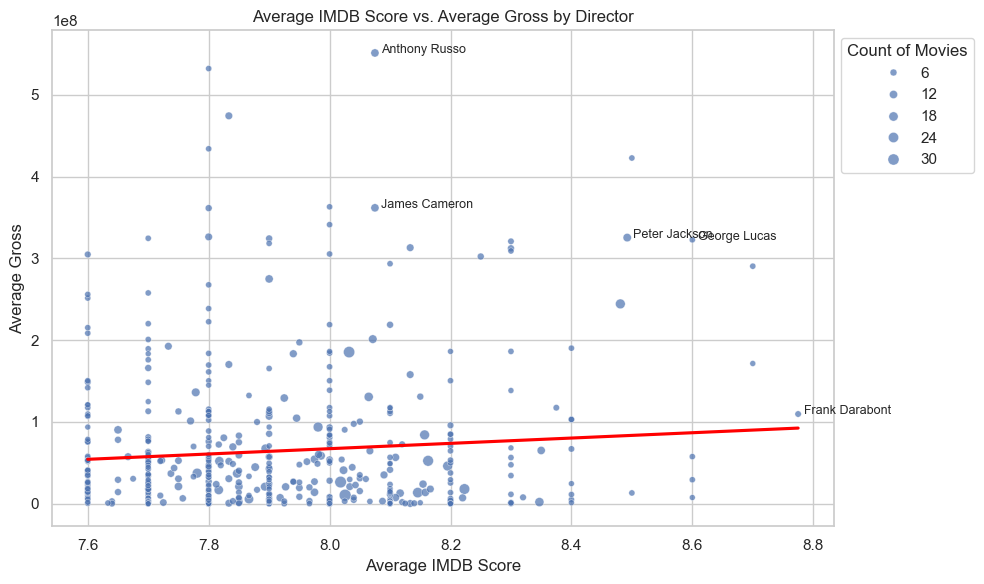

In [68]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=director_stats_filtered,
    x='avg_rating',
    y='avg_gross',
    size='count_movies',  
    alpha=0.7,             
    palette='Dark2'
)
sns.regplot(
    data=director_stats_filtered,
    x='avg_rating',
    y='avg_gross',
    scatter=False,
    ci=None,
    color='red'
)

highlighted_directors = [
    "Frank Darabont",
    "George Lucas",
    "Peter Jackson",
    "James Cameron",
    "Anthony Russo"
]

for i, row in director_stats_filtered.iterrows():
    if row['director'] in highlighted_directors:
        plt.text(
            x=row['avg_rating']+0.01,
            y=row['avg_gross']+0.01,
            s=row['director'],
            fontsize=9
        )


plt.title('Average IMDB Score vs. Average Gross by Director')
plt.xlabel('Average IMDB Score')
plt.ylabel('Average Gross')
plt.legend(title='Count of Movies', loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


In [69]:
top_rating = director_stats_filtered[['director', 'avg_rating', 'count_movies']].nlargest(10, 'avg_rating')
top_gross = director_stats_filtered[['director', 'avg_gross', 'count_movies']].nlargest(10, 'avg_gross')

### Top 10 directors for average rating and gross revenue 

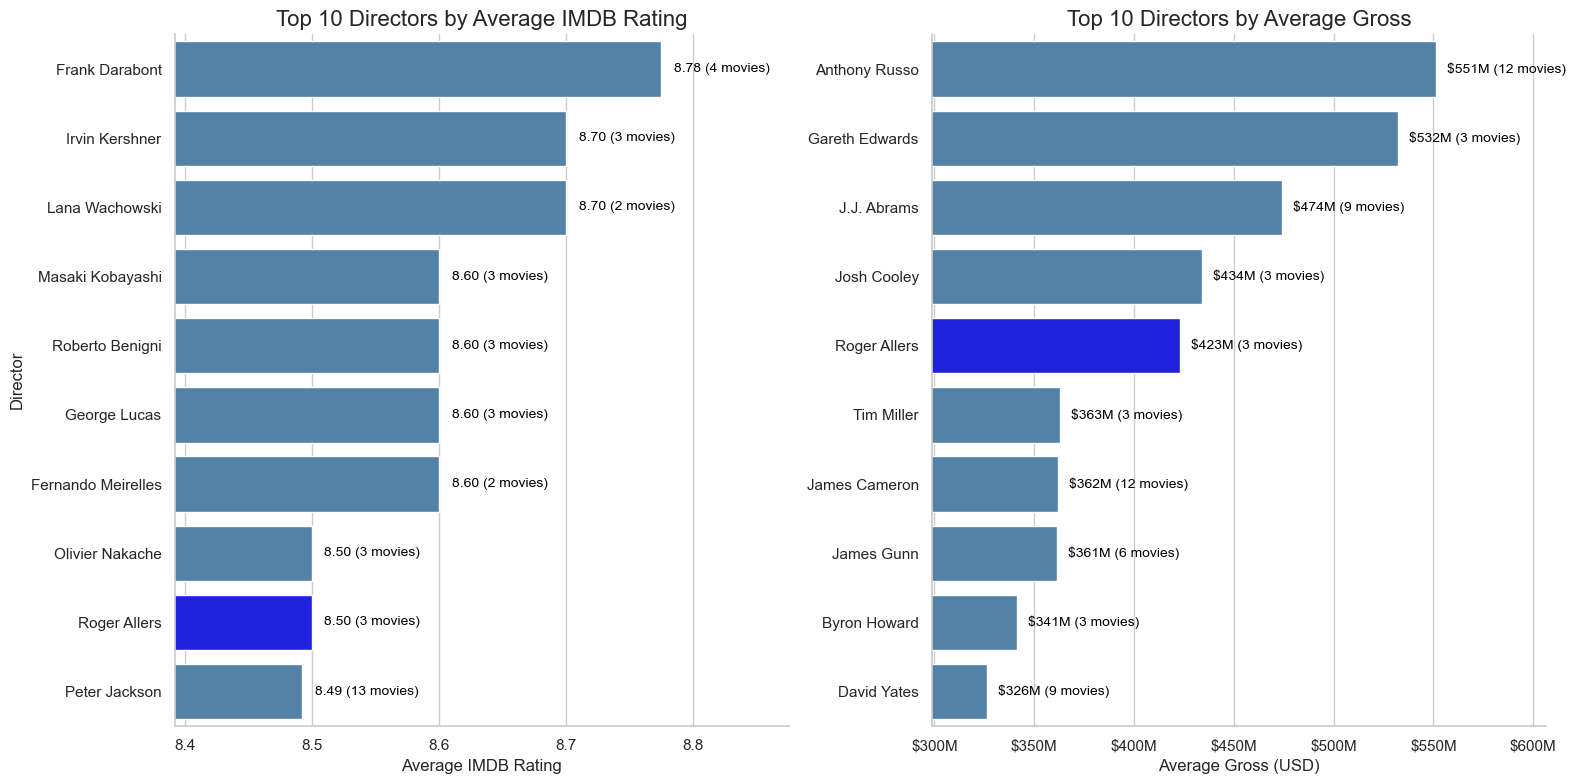

In [70]:
shared_directors = ["Roger Allers"]
shared_palette = {
    "Roger Allers": "blue",
}
default_color = "steelblue"

# Helper function to pick color
def get_color_for_director(d):
    return shared_palette[d] if d in shared_palette else default_color

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# ================== FIRST SUBPLOT: Top 10 Directors by Rating ================== #
colors_top_rating = [get_color_for_director(d) for d in top_rating['director']]
sns.barplot(
    data=top_rating,
    x='avg_rating',
    y='director',
    palette=colors_top_rating,
    ax=ax1
)

for i, (rating_val, num_movies, director_name) in enumerate(zip(
        top_rating['avg_rating'], 
        top_rating['count_movies'],
        top_rating['director'])):
    color_label = colors_top_rating[i] 
    ax1.text(
        rating_val + 0.01,
        i,
        f"{rating_val:.2f} ({num_movies} movies)",
        va='center',
        fontsize=10,
        color='black'  
    )

ax1.set_title('Top 10 Directors by Average IMDB Rating', fontdict={'fontsize': 16})
ax1.set_xlabel('Average IMDB Rating')
ax1.set_ylabel('Director')

min_rating = top_rating['avg_rating'].min()
max_rating = top_rating['avg_rating'].max()
ax1.set_xlim(min_rating - 0.1, max_rating + 0.1)

# ================== SECOND SUBPLOT: Top 10 Directors by Gross ================== #
colors_top_gross = [get_color_for_director(d) for d in top_gross['director']]
sns.barplot(
    data=top_gross,
    x='avg_gross',
    y='director',
    palette=colors_top_gross,
    ax=ax2
)

min_gross = top_gross['avg_gross'].min()
max_gross = top_gross['avg_gross'].max()
ax2.set_xlim(min_gross - (max_gross * 0.05), max_gross * 1.1)

for i, (gross_val, num_movies, director_name) in enumerate(zip(
        top_gross['avg_gross'], 
        top_gross['count_movies'],
        top_gross['director'])):
    
    x_offset = 0.01 * max_gross 
    
    text_x = gross_val + x_offset
    
    gross_millions = gross_val / 1e6
    
    ax2.text(
        text_x,
        i,
        f"${gross_millions:,.0f}M ({num_movies} movies)",
        va='center',
        fontsize=10,
        color='black' 
    )

ax2.set_title('Top 10 Directors by Average Gross', fontdict={'fontsize': 16})
ax2.set_xlabel('Average Gross (USD)')
ax2.set_ylabel('')


def millions(x, pos):
    return f'${x*1e-6:.0f}M'
ax2.xaxis.set_major_formatter(FuncFormatter(millions))
sns.despine(ax=ax1, top=True, right=True)
sns.despine(ax=ax2, top=True, right=True)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('./data/imdb_cleaned.csv', index=False)